In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
pd.options.mode.chained_assignment = None

In [2]:
# read the merged data
merged_data = pd.read_csv("cleaned_data.csv")
merged_data

C:\Users\prana\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ride_id,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,Year,Month,...,Hour,Temperature,Humidity,Wind Speed,Wind Gust,Precipitation,Condition,index,Holiday_Name,Weekend
0,25612325,2019-11-01 00:00:45,2019-11-01 00:08:10,Ellis Ave & 55th St,420.0,Harper Ave & 59th St,425.0,Subscriber,2019,11,...,0,26 F,81,8 mph,0 mph,0.0 in,Fair,103,Not Holiday,0
1,25612326,2019-11-01 00:01:13,2019-11-01 00:30:09,Western Ave & Winnebago Ave,116.0,Morgan St & Polk St,241.0,Customer,2019,11,...,0,26 F,81,8 mph,0 mph,0.0 in,Fair,103,Not Holiday,0
2,25612327,2019-11-01 00:01:42,2019-11-01 00:38:32,Western Ave & Winnebago Ave,116.0,May St & Taylor St,22.0,Subscriber,2019,11,...,0,26 F,81,8 mph,0 mph,0.0 in,Fair,103,Not Holiday,0
3,25612328,2019-11-01 00:02:24,2019-11-01 00:09:27,Lincoln Ave & Winona St,472.0,Maplewood Ave & Peterson Ave,455.0,Subscriber,2019,11,...,0,26 F,81,8 mph,0 mph,0.0 in,Fair,103,Not Holiday,0
4,25612329,2019-11-01 00:02:30,2019-11-01 00:04:09,Clinton St & Madison St,77.0,Clinton St & Washington Blvd,91.0,Subscriber,2019,11,...,0,26 F,81,8 mph,0 mph,0.0 in,Fair,103,Not Holiday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3807053,A4D50CAC9CCFB180,2020-10-20 01:51:54,2020-10-20 01:59:11,Kimbark Ave & 53rd St,322.0,Blackstone Ave & Hyde Park Blvd,121.0,member,2020,10,...,1,44 F,79,9mph,0mph,0.0in,Cloudy,355,Not Holiday,0
3807054,2D551117FD01DCE1,2020-10-20 01:04:29,2020-10-20 01:19:33,Pine Grove Ave & Irving Park Rd,254.0,Glenwood Ave & Morse Ave,447.0,member,2020,10,...,1,44 F,79,8mph,0mph,0.0in,Cloudy,355,Not Holiday,0
3807055,2D551117FD01DCE1,2020-10-20 01:04:29,2020-10-20 01:19:33,Pine Grove Ave & Irving Park Rd,254.0,Glenwood Ave & Morse Ave,447.0,member,2020,10,...,1,44 F,79,9mph,0mph,0.0in,Cloudy,355,Not Holiday,0
3807056,09264F6A1F8E4CEE,2020-10-20 01:38:07,2020-10-20 01:48:04,St. Clair St & Erie St,211.0,Clark St & Armitage Ave,94.0,member,2020,10,...,1,44 F,79,8mph,0mph,0.0in,Cloudy,355,Not Holiday,0


In [3]:
# get the information about the attributes 
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3807058 entries, 0 to 3807057
Data columns (total 21 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   started_at          object 
 2   ended_at            object 
 3   start_station_name  object 
 4   start_station_id    float64
 5   end_station_name    object 
 6   end_station_id      float64
 7   member_casual       object 
 8   Year                int64  
 9   Month               int64  
 10  Day                 int64  
 11  Hour                int64  
 12  Temperature         object 
 13  Humidity            int64  
 14  Wind Speed          object 
 15  Wind Gust           object 
 16  Precipitation       object 
 17  Condition           object 
 18  index               int64  
 19  Holiday_Name        object 
 20  Weekend             int64  
dtypes: float64(2), int64(7), object(12)
memory usage: 610.0+ MB


In [4]:
# extract date from the started_at column and use as a separate column
merged_data['started_at'] = pd.to_datetime(merged_data['started_at'])
merged_data['Date'] = merged_data['started_at'].dt.date
merged_data

,ride_id,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,Year,Month,...,Temperature,Humidity,Wind Speed,Wind Gust,Precipitation,Condition,index,Holiday_Name,Weekend,Date
0,25612325,2019-11-01 00:00:45,2019-11-01 00:08:10,Ellis Ave & 55th St,420.0,Harper Ave & 59th St,425.0,Subscriber,2019,11,...,26 F,81,8 mph,0 mph,0.0 in,Fair,103,Not Holiday,0,2019-11-01
1,25612326,2019-11-01 00:01:13,2019-11-01 00:30:09,Western Ave & Winnebago Ave,116.0,Morgan St & Polk St,241.0,Customer,2019,11,...,26 F,81,8 mph,0 mph,0.0 in,Fair,103,Not Holiday,0,2019-11-01
2,25612327,2019-11-01 00:01:42,2019-11-01 00:38:32,Western Ave & Winnebago Ave,116.0,May St & Taylor St,22.0,Subscriber,2019,11,...,26 F,81,8 mph,0 mph,0.0 in,Fair,103,Not Holiday,0,2019-11-01
3,25612328,2019-11-01 00:02:24,2019-11-01 00:09:27,Lincoln Ave & Winona St,472.0,Maplewood Ave & Peterson Ave,455.0,Subscriber,2019,11,...,26 F,81,8 mph,0 mph,0.0 in,Fair,103,Not Holiday,0,2019-11-01
4,25612329,2019-11-01 00:02:30,2019-11-01 00:04:09,Clinton St & Madison St,77.0,Clinton St & Washington Blvd,91.0,Subscriber,2019,11,...,26 F,81,8 mph,0 mph,0.0 in,Fair,103,Not Holiday,0,2019-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3807053,A4D50CAC9CCFB180,2020-10-20 01:51:54,2020-10-20 01:59:11,Kimbark Ave & 53rd St,322.0,Blackstone Ave & Hyde Park Blvd,121.0,member,2020,10,...,44 F,79,9mph,0mph,0.0in,Cloudy,355,Not Holiday,0,2020-10-20
3807054,2D551117FD01DCE1,2020-10-20 01:04:29,2020-10-20 01:19:33,Pine Grove Ave & Irving Park Rd,254.0,Glenwood Ave & Morse Ave,447.0,member,2020,10,...,44 F,79,8mph,0mph,0.0in,Cloudy,355,Not Holiday,0,2020-10-20
3807055,2D551117FD01DCE1,2020-10-20 01:04:29,2020-10-20 01:19:33,Pine Grove Ave & Irving Park Rd,254.0,Glenwood Ave & Morse Ave,447.0,member,2020,10,...,44 F,79,9mph,0mph,0.0in,Cloudy,355,Not Holiday,0,2020-10-20
3807056,09264F6A1F8E4CEE,2020-10-20 01:38:07,2020-10-20 01:48:04,St. Clair St & Erie St,211.0,Clark St & Armitage Ave,94.0,member,2020,10,...,44 F,79,8mph,0mph,0.0in,Cloudy,355,Not Holiday,0,2020-10-20


In [5]:
# get number of bike checkouts per hour by grouping 
checkouts = merged_data.groupby(by=['Date', 'start_station_name', 'start_station_id', 'Year', 'Month', 'Day', 'Hour', 'Temperature', 'Humidity', 'Wind Speed', 'Wind Gust', 'Precipitation', 'Condition', 'Holiday_Name', 'Weekend']).size().reset_index(name='Checkouts')
checkouts

,Date,start_station_name,start_station_id,Year,Month,Day,Hour,Temperature,Humidity,Wind Speed,Wind Gust,Precipitation,Condition,Holiday_Name,Weekend,Checkouts
0,2019-11-01,63rd St Beach,101.0,2019,11,1,18,43 F,68,6 mph,0 mph,0.0 in,Cloudy,Not Holiday,0,1
1,2019-11-01,63rd St Beach,101.0,2019,11,1,20,38 F,79,15 mph,0 mph,0.0 in,Light Rain,Not Holiday,0,1
2,2019-11-01,900 W Harrison St,109.0,2019,11,1,10,38 F,62,10 mph,0 mph,0.0 in,Mostly Cloudy,Not Holiday,0,4
3,2019-11-01,900 W Harrison St,109.0,2019,11,1,11,41 F,55,14 mph,24 mph,0.0 in,Mostly Cloudy,Not Holiday,0,2
4,2019-11-01,900 W Harrison St,109.0,2019,11,1,12,43 F,51,15 mph,29 mph,0.0 in,Mostly Cloudy,Not Holiday,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445486,2020-10-31,Woodlawn Ave & 55th St,248.0,2020,10,31,22,53 F,61,16mph,25mph,0.0in,Mostly Cloudy,Weekend,1,1
1445487,2020-10-31,Woodlawn Ave & Lake Park Ave,413.0,2020,10,31,13,58 F,39,21mph,31mph,0.0in,Fair / Windy,Weekend,1,1
1445488,2020-10-31,Woodlawn Ave & Lake Park Ave,413.0,2020,10,31,15,59 F,38,18mph,26mph,0.0in,Fair,Weekend,1,2
1445489,2020-10-31,Woodlawn Ave & Lake Park Ave,413.0,2020,10,31,16,57 F,44,15mph,32mph,0.0in,Fair,Weekend,1,1


In [6]:
# sort by Date in ascending order
checkouts.sort_values(by='Date', inplace=True)
checkouts

,Date,start_station_name,start_station_id,Year,Month,Day,Hour,Temperature,Humidity,Wind Speed,Wind Gust,Precipitation,Condition,Holiday_Name,Weekend,Checkouts
0,2019-11-01,63rd St Beach,101.0,2019,11,1,18,43 F,68,6 mph,0 mph,0.0 in,Cloudy,Not Holiday,0,1
2249,2019-11-01,Milwaukee Ave & Wabansia Ave,158.0,2019,11,1,21,37 F,86,13 mph,0 mph,0.0 in,Light Drizzle,Not Holiday,0,1
2250,2019-11-01,Milwaukee Ave & Wabansia Ave,158.0,2019,11,1,21,38 F,83,10 mph,0 mph,0.0 in,Light Rain,Not Holiday,0,2
2251,2019-11-01,Milwaukee Ave & Wabansia Ave,158.0,2019,11,1,23,27 F,81,7 mph,0 mph,0.0 in,Fair,Not Holiday,0,1
2252,2019-11-01,Monticello Ave & Irving Park Rd,484.0,2019,11,1,8,31 F,79,9 mph,0 mph,0.0 in,Mostly Cloudy,Not Holiday,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442631,2020-10-31,Ellis Ave & 53rd St,418.0,2020,10,31,21,52 F,66,16mph,30mph,0.0in,Cloudy,Weekend,1,1
1442632,2020-10-31,Ellis Ave & 55th St,420.0,2020,10,31,0,33 F,72,3mph,0mph,0.0in,Fair,Weekend,1,1
1442633,2020-10-31,Ellis Ave & 55th St,420.0,2020,10,31,3,33 F,66,7mph,0mph,0.0in,Fair,Weekend,1,1
1442619,2020-10-31,Elizabeth (May) St & Fulton St,217.0,2020,10,31,15,59 F,38,18mph,26mph,0.0in,Fair,Weekend,1,1


In [7]:
# set Checkouts to be at the end of the dataframe
df = checkouts.pop('Checkouts')
checkouts['Checkouts'] = df
checkouts

,Date,start_station_name,start_station_id,Year,Month,Day,Hour,Temperature,Humidity,Wind Speed,Wind Gust,Precipitation,Condition,Holiday_Name,Weekend,Checkouts
0,2019-11-01,63rd St Beach,101.0,2019,11,1,18,43 F,68,6 mph,0 mph,0.0 in,Cloudy,Not Holiday,0,1
2249,2019-11-01,Milwaukee Ave & Wabansia Ave,158.0,2019,11,1,21,37 F,86,13 mph,0 mph,0.0 in,Light Drizzle,Not Holiday,0,1
2250,2019-11-01,Milwaukee Ave & Wabansia Ave,158.0,2019,11,1,21,38 F,83,10 mph,0 mph,0.0 in,Light Rain,Not Holiday,0,2
2251,2019-11-01,Milwaukee Ave & Wabansia Ave,158.0,2019,11,1,23,27 F,81,7 mph,0 mph,0.0 in,Fair,Not Holiday,0,1
2252,2019-11-01,Monticello Ave & Irving Park Rd,484.0,2019,11,1,8,31 F,79,9 mph,0 mph,0.0 in,Mostly Cloudy,Not Holiday,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442631,2020-10-31,Ellis Ave & 53rd St,418.0,2020,10,31,21,52 F,66,16mph,30mph,0.0in,Cloudy,Weekend,1,1
1442632,2020-10-31,Ellis Ave & 55th St,420.0,2020,10,31,0,33 F,72,3mph,0mph,0.0in,Fair,Weekend,1,1
1442633,2020-10-31,Ellis Ave & 55th St,420.0,2020,10,31,3,33 F,66,7mph,0mph,0.0in,Fair,Weekend,1,1
1442619,2020-10-31,Elizabeth (May) St & Fulton St,217.0,2020,10,31,15,59 F,38,18mph,26mph,0.0in,Fair,Weekend,1,1


In [8]:
# save to a csv file
checkouts.to_csv("checkouts_unclean.csv", index=False)

In [9]:
# target variable y - number of checkouts
y = checkouts['Checkouts']
y

0          1
2249       1
2250       2
2251       1
2252       1
          ..
1442631    1
1442632    1
1442633    1
1442619    1
1445490    1
Name: Checkouts, Length: 1445491, dtype: int64

In [10]:
# since many of the attributes had string values, remove them and convert those attributes to numerical values
checkouts['Temperature'] = pd.to_numeric(checkouts['Temperature'].str.replace('F', ''))
checkouts.rename({"Temperature": "Temperature (F)"}, axis=1, inplace=True)
checkouts['Wind Speed'] = pd.to_numeric(checkouts['Wind Speed'].str.replace('mph', ''))
checkouts['Wind Gust'] = pd.to_numeric(checkouts['Wind Gust'].str.replace('mph', ''))
checkouts['Precipitation'] = pd.to_numeric(checkouts['Precipitation'].str.replace('in', ''))
# checkout_data.to_csv("results/final_checkouts.csv", index=False)
checkouts

,Date,start_station_name,start_station_id,Year,Month,Day,Hour,Temperature (F),Humidity,Wind Speed,Wind Gust,Precipitation,Condition,Holiday_Name,Weekend,Checkouts
0,2019-11-01,63rd St Beach,101.0,2019,11,1,18,43,68,6,0,0.0,Cloudy,Not Holiday,0,1
2249,2019-11-01,Milwaukee Ave & Wabansia Ave,158.0,2019,11,1,21,37,86,13,0,0.0,Light Drizzle,Not Holiday,0,1
2250,2019-11-01,Milwaukee Ave & Wabansia Ave,158.0,2019,11,1,21,38,83,10,0,0.0,Light Rain,Not Holiday,0,2
2251,2019-11-01,Milwaukee Ave & Wabansia Ave,158.0,2019,11,1,23,27,81,7,0,0.0,Fair,Not Holiday,0,1
2252,2019-11-01,Monticello Ave & Irving Park Rd,484.0,2019,11,1,8,31,79,9,0,0.0,Mostly Cloudy,Not Holiday,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442631,2020-10-31,Ellis Ave & 53rd St,418.0,2020,10,31,21,52,66,16,30,0.0,Cloudy,Weekend,1,1
1442632,2020-10-31,Ellis Ave & 55th St,420.0,2020,10,31,0,33,72,3,0,0.0,Fair,Weekend,1,1
1442633,2020-10-31,Ellis Ave & 55th St,420.0,2020,10,31,3,33,66,7,0,0.0,Fair,Weekend,1,1
1442619,2020-10-31,Elizabeth (May) St & Fulton St,217.0,2020,10,31,15,59,38,18,26,0.0,Fair,Weekend,1,1


In [11]:
# set a new column Remarks with values as the Holiday_Name attribute
checkouts['Remarks'] = checkouts['Holiday_Name']

In [12]:
# convert Date to datetime
checkouts.Date = pd.to_datetime(checkouts.Date, format="%Y-%m-%d")
# convert the date into seconds to use it for prediction
checkouts['Converted Date'] = checkouts.Date.apply(lambda var: time.mktime(var.timetuple()))

# set checkouts to be at the end of the dataframe
df = checkouts.pop('Converted Date')
# and set the date to be the first column in the dataframe
checkouts.insert(0, column='Converted Date', value=df)
# drop the unnecessary columns
checkouts.drop(['Year', 'Day', 'start_station_name'], axis=1, inplace=True)
checkouts

,Converted Date,Date,start_station_id,Month,Hour,Temperature (F),Humidity,Wind Speed,Wind Gust,Precipitation,Condition,Holiday_Name,Weekend,Checkouts,Remarks
0,1.572581e+09,2019-11-01,101.0,11,18,43,68,6,0,0.0,Cloudy,Not Holiday,0,1,Not Holiday
2249,1.572581e+09,2019-11-01,158.0,11,21,37,86,13,0,0.0,Light Drizzle,Not Holiday,0,1,Not Holiday
2250,1.572581e+09,2019-11-01,158.0,11,21,38,83,10,0,0.0,Light Rain,Not Holiday,0,2,Not Holiday
2251,1.572581e+09,2019-11-01,158.0,11,23,27,81,7,0,0.0,Fair,Not Holiday,0,1,Not Holiday
2252,1.572581e+09,2019-11-01,484.0,11,8,31,79,9,0,0.0,Mostly Cloudy,Not Holiday,0,1,Not Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442631,1.604117e+09,2020-10-31,418.0,10,21,52,66,16,30,0.0,Cloudy,Weekend,1,1,Weekend
1442632,1.604117e+09,2020-10-31,420.0,10,0,33,72,3,0,0.0,Fair,Weekend,1,1,Weekend
1442633,1.604117e+09,2020-10-31,420.0,10,3,33,66,7,0,0.0,Fair,Weekend,1,1,Weekend
1442619,1.604117e+09,2020-10-31,217.0,10,15,59,38,18,26,0.0,Fair,Weekend,1,1,Weekend


In [13]:
# get day of week from the Date attribute
checkouts['Day of Week'] = checkouts.Date.dt.dayofweek
checkouts

,Converted Date,Date,start_station_id,Month,Hour,Temperature (F),Humidity,Wind Speed,Wind Gust,Precipitation,Condition,Holiday_Name,Weekend,Checkouts,Remarks,Day of Week
0,1.572581e+09,2019-11-01,101.0,11,18,43,68,6,0,0.0,Cloudy,Not Holiday,0,1,Not Holiday,4
2249,1.572581e+09,2019-11-01,158.0,11,21,37,86,13,0,0.0,Light Drizzle,Not Holiday,0,1,Not Holiday,4
2250,1.572581e+09,2019-11-01,158.0,11,21,38,83,10,0,0.0,Light Rain,Not Holiday,0,2,Not Holiday,4
2251,1.572581e+09,2019-11-01,158.0,11,23,27,81,7,0,0.0,Fair,Not Holiday,0,1,Not Holiday,4
2252,1.572581e+09,2019-11-01,484.0,11,8,31,79,9,0,0.0,Mostly Cloudy,Not Holiday,0,1,Not Holiday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442631,1.604117e+09,2020-10-31,418.0,10,21,52,66,16,30,0.0,Cloudy,Weekend,1,1,Weekend,5
1442632,1.604117e+09,2020-10-31,420.0,10,0,33,72,3,0,0.0,Fair,Weekend,1,1,Weekend,5
1442633,1.604117e+09,2020-10-31,420.0,10,3,33,66,7,0,0.0,Fair,Weekend,1,1,Weekend,5
1442619,1.604117e+09,2020-10-31,217.0,10,15,59,38,18,26,0.0,Fair,Weekend,1,1,Weekend,5


In [14]:
# create a Seasons column based on the Month column
seasonal_data = []
months = list(set(checkouts['Month']))
for month in months:
    if month in range(3, 6):
        seasonal_data.append("Spring")
    elif month in range(6, 9):
        seasonal_data.append("Summer")
    elif month in range(9, 12):
        seasonal_data.append("Fall")
    else:
        seasonal_data.append('Winter')
print(seasonal_data)

checkouts['Seasons'] = checkouts['Month'].replace(to_replace=months, value=seasonal_data)
checkouts

['Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer', 'Summer', 'Summer', 'Fall', 'Fall', 'Fall', 'Winter']


,Converted Date,Date,start_station_id,Month,Hour,Temperature (F),Humidity,Wind Speed,Wind Gust,Precipitation,Condition,Holiday_Name,Weekend,Checkouts,Remarks,Day of Week,Seasons
0,1.572581e+09,2019-11-01,101.0,11,18,43,68,6,0,0.0,Cloudy,Not Holiday,0,1,Not Holiday,4,Fall
2249,1.572581e+09,2019-11-01,158.0,11,21,37,86,13,0,0.0,Light Drizzle,Not Holiday,0,1,Not Holiday,4,Fall
2250,1.572581e+09,2019-11-01,158.0,11,21,38,83,10,0,0.0,Light Rain,Not Holiday,0,2,Not Holiday,4,Fall
2251,1.572581e+09,2019-11-01,158.0,11,23,27,81,7,0,0.0,Fair,Not Holiday,0,1,Not Holiday,4,Fall
2252,1.572581e+09,2019-11-01,484.0,11,8,31,79,9,0,0.0,Mostly Cloudy,Not Holiday,0,1,Not Holiday,4,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442631,1.604117e+09,2020-10-31,418.0,10,21,52,66,16,30,0.0,Cloudy,Weekend,1,1,Weekend,5,Fall
1442632,1.604117e+09,2020-10-31,420.0,10,0,33,72,3,0,0.0,Fair,Weekend,1,1,Weekend,5,Fall
1442633,1.604117e+09,2020-10-31,420.0,10,3,33,66,7,0,0.0,Fair,Weekend,1,1,Weekend,5,Fall
1442619,1.604117e+09,2020-10-31,217.0,10,15,59,38,18,26,0.0,Fair,Weekend,1,1,Weekend,5,Fall


In [15]:
# remove unnecessary columns
checkouts.drop(['Date', 'Checkouts', 'Condition', 'Weekend', 'Remarks'], axis=1, inplace=True)
checkouts

,Converted Date,start_station_id,Month,Hour,Temperature (F),Humidity,Wind Speed,Wind Gust,Precipitation,Holiday_Name,Day of Week,Seasons
0,1.572581e+09,101.0,11,18,43,68,6,0,0.0,Not Holiday,4,Fall
2249,1.572581e+09,158.0,11,21,37,86,13,0,0.0,Not Holiday,4,Fall
2250,1.572581e+09,158.0,11,21,38,83,10,0,0.0,Not Holiday,4,Fall
2251,1.572581e+09,158.0,11,23,27,81,7,0,0.0,Not Holiday,4,Fall
2252,1.572581e+09,484.0,11,8,31,79,9,0,0.0,Not Holiday,4,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...
1442631,1.604117e+09,418.0,10,21,52,66,16,30,0.0,Weekend,5,Fall
1442632,1.604117e+09,420.0,10,0,33,72,3,0,0.0,Weekend,5,Fall
1442633,1.604117e+09,420.0,10,3,33,66,7,0,0.0,Weekend,5,Fall
1442619,1.604117e+09,217.0,10,15,59,38,18,26,0.0,Weekend,5,Fall


In [16]:
# one hot encoding the holidays and seasons columns
y1 = pd.get_dummies(checkouts['Holiday_Name'], prefix='Holiday')
y2 = pd.get_dummies(checkouts['Seasons'], prefix='Season')

In [17]:
# add to the dataframe
checkout_data = pd.concat([checkouts, y1, y2], axis=1)
# and drop those corresponding attributes
checkout_data.drop(['Holiday_Name', 'Seasons'], axis=1, inplace=True)
X = checkout_data
X

,Converted Date,start_station_id,Month,Hour,Temperature (F),Humidity,Wind Speed,Wind Gust,Precipitation,Day of Week,...,Holiday_Summer Vacation,Holiday_Thanksgiving Day,Holiday_Veterans Day,Holiday_Washington's Birthday,Holiday_Weekend,Holiday_Winter Vacation,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,1.572581e+09,101.0,11,18,43,68,6,0,0.0,4,...,0,0,0,0,0,0,1,0,0,0
2249,1.572581e+09,158.0,11,21,37,86,13,0,0.0,4,...,0,0,0,0,0,0,1,0,0,0
2250,1.572581e+09,158.0,11,21,38,83,10,0,0.0,4,...,0,0,0,0,0,0,1,0,0,0
2251,1.572581e+09,158.0,11,23,27,81,7,0,0.0,4,...,0,0,0,0,0,0,1,0,0,0
2252,1.572581e+09,484.0,11,8,31,79,9,0,0.0,4,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442631,1.604117e+09,418.0,10,21,52,66,16,30,0.0,5,...,0,0,0,0,1,0,1,0,0,0
1442632,1.604117e+09,420.0,10,0,33,72,3,0,0.0,5,...,0,0,0,0,1,0,1,0,0,0
1442633,1.604117e+09,420.0,10,3,33,66,7,0,0.0,5,...,0,0,0,0,1,0,1,0,0,0
1442619,1.604117e+09,217.0,10,15,59,38,18,26,0.0,5,...,0,0,0,0,1,0,1,0,0,0


In [18]:
X.shape

(1445491, 30)

In [19]:
y.shape

(1445491,)

In [20]:
# split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
X_test

,Converted Date,start_station_id,Month,Hour,Temperature (F),Humidity,Wind Speed,Wind Gust,Precipitation,Day of Week,...,Holiday_Summer Vacation,Holiday_Thanksgiving Day,Holiday_Veterans Day,Holiday_Washington's Birthday,Holiday_Weekend,Holiday_Winter Vacation,Season_Fall,Season_Spring,Season_Summer,Season_Winter
964807,1.596773e+09,341.0,8,14,82,41,13,18,0.0,4,...,1,0,0,0,0,0,0,0,1,0
955221,1.596600e+09,150.0,8,11,74,40,7,0,0.0,2,...,1,0,0,0,0,0,0,0,1,0
791160,1.594181e+09,262.0,7,18,84,51,5,0,0.0,2,...,1,0,0,0,0,0,0,0,1,0
651904,1.591934e+09,659.0,6,19,58,60,14,0,0.0,4,...,0,0,0,0,0,0,0,0,1,0
600647,1.590638e+09,185.0,5,6,72,84,10,0,0.0,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185150,1.599970e+09,183.0,9,14,74,55,8,0,0.0,6,...,0,0,0,0,1,0,1,0,0,0
805475,1.594354e+09,227.0,7,15,85,46,15,29,0.0,4,...,1,0,0,0,0,0,0,0,1,0
28887,1.573189e+09,185.0,11,22,28,47,12,0,0.0,4,...,0,0,0,0,0,0,1,0,0,0
345562,1.582434e+09,185.0,2,13,54,43,17,0,0.0,6,...,0,0,0,0,1,0,0,0,0,1


## Multiple Linear Regression

In [21]:
mult_lin = LinearRegression()

In [22]:
# fit the linear regression model
ml = mult_lin.fit(X_train, y_train)

In [23]:
y_pred = ml.predict(X_test)
y_pred

array([3.34125224, 3.38774196, 3.50707192, ..., 3.02692489, 3.34135269,
       1.84678805])

In [24]:
ml.score(X_test, y_test)

0.09068256244612716

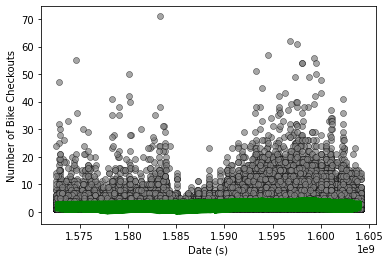

In [25]:
# plot the regression curve
fig, ax = plt.subplots()
plt.style.use('default')
plt.style.use('ggplot')
ax.plot(X_test['Converted Date'], y_pred, color='g', label='Regression Model')
ax.scatter(X_test['Converted Date'], y_test, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample Data')
ax.set_ylabel("Number of Bike Checkouts")
ax.set_xlabel("Date (s)")

plt.show()

In [26]:
# sample predictions generated
pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

,y_test,y_pred
964807,11,3.341252
955221,1,3.387742
791160,1,3.507072
651904,2,1.737360
600647,1,1.907557
...,...,...
1185150,1,3.549704
805475,3,3.618038
28887,1,3.026925
345562,1,3.341353


## Lasso Regression

In [27]:
lasso = Lasso()

In [28]:
# fit the model
las = lasso.fit(X_train, y_train)

In [29]:
las.score(X_test, y_test)

0.07389359703295206

In [30]:
y_lasso_pred = las.predict(X_test)
y_lasso_pred

array([3.12885732, 3.42980883, 3.26209701, ..., 2.15831213, 2.72220792,
       2.17042428])

In [31]:
# sample output prediction
pd.DataFrame({'y_test': y_test, 'y_lasso_pred': y_lasso_pred})

,y_test,y_lasso_pred
964807,11,3.128857
955221,1,3.429809
791160,1,3.262097
651904,2,1.615644
600647,1,2.586613
...,...,...
1185150,1,3.257106
805475,3,3.391654
28887,1,2.158312
345562,1,2.722208


## Ridge Regression

In [32]:
ridge = Ridge()

In [33]:
# fit the model
rid = ridge.fit(X_train, y_train)

C:\Users\prana\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.65583e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [34]:
rid.score(X_test, y_test)

0.09068257878147568

In [35]:
y_ridge_pred = rid.predict(X_test)
y_ridge_pred

array([3.34124669, 3.38774659, 3.50706889, ..., 3.02692388, 3.34135781,
       1.84677361])

In [36]:
# sample output prediction
pd.DataFrame({'y_test': y_test, 'y_ridge_pred': y_ridge_pred})

,y_test,y_ridge_pred
964807,11,3.341247
955221,1,3.387747
791160,1,3.507069
651904,2,1.737368
600647,1,1.907550
...,...,...
1185150,1,3.549709
805475,3,3.618025
28887,1,3.026924
345562,1,3.341358


## Decision Tree Regressor

In [37]:
dec = DecisionTreeRegressor()

In [38]:
d = dec.fit(X_train, y_train)

In [39]:
d.score(X_test, y_test)

0.28001245104609296

In [40]:
y_dec_pred = d.predict(X_test)
y_dec_pred

array([10.,  1.,  2., ...,  1.,  2.,  1.])

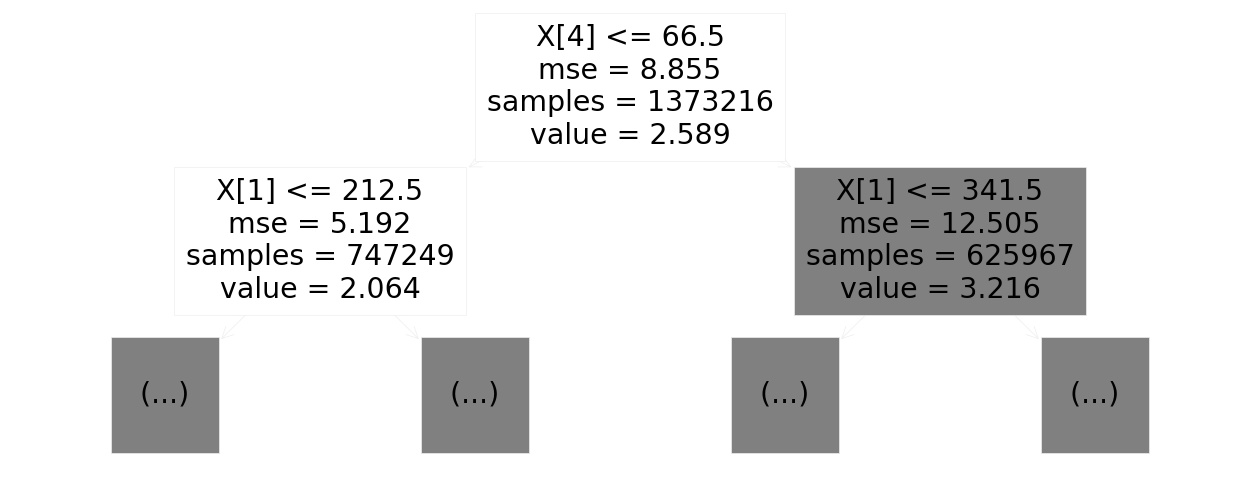

In [42]:
# plot the decision tree of depth 1 (for visualizing)
plt.figure(figsize=(16,6))
_ = plot_tree(dec, max_depth=1)
plt.savefig("dec_tree.jpg")

In [43]:
# sample output prediction
pd.DataFrame({'y_test': y_test, 'y_dec_pred': y_dec_pred})

,y_test,y_dec_pred
964807,11,10.0
955221,1,1.0
791160,1,2.0
651904,2,1.0
600647,1,1.0
...,...,...
1185150,1,2.0
805475,3,4.0
28887,1,1.0
345562,1,2.0


## Random Forest Regressor

In [44]:
rand = RandomForestRegressor()

In [45]:
# fit the model
r = rand.fit(X_train, y_train)

In [46]:
y_rand_pred = r.predict(X_test)
y_rand_pred

array([6.19, 2.19, 1.67, ..., 1.09, 2.31, 1.02])

In [47]:
# sample output prediction
pd.DataFrame({'y_test': y_test, 'y_rand_pred': y_rand_pred})

,y_test,y_rand_pred
964807,11,6.19
955221,1,2.19
791160,1,1.67
651904,2,1.45
600647,1,1.54
...,...,...
1185150,1,4.02
805475,3,3.35
28887,1,1.09
345562,1,2.31


## Final Results

In [48]:
table_data = [
    ['Linear Regression',mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)],
    ['Lasso Regression', mean_absolute_error(y_test, y_lasso_pred), mean_squared_error(y_test, y_lasso_pred), r2_score(y_test, y_lasso_pred)],
    ['Ridge Regression', mean_absolute_error(y_test, y_ridge_pred), mean_squared_error(y_test, y_ridge_pred), r2_score(y_test, y_ridge_pred)],
    ['Decision Tree Regression', mean_absolute_error(y_test, y_dec_pred), mean_squared_error(y_test, y_dec_pred), r2_score(y_test, y_dec_pred)],
    ['Random Forest Regression', mean_absolute_error(y_test, y_rand_pred), mean_squared_error(y_test, y_rand_pred), r2_score(y_test, y_rand_pred)]
]

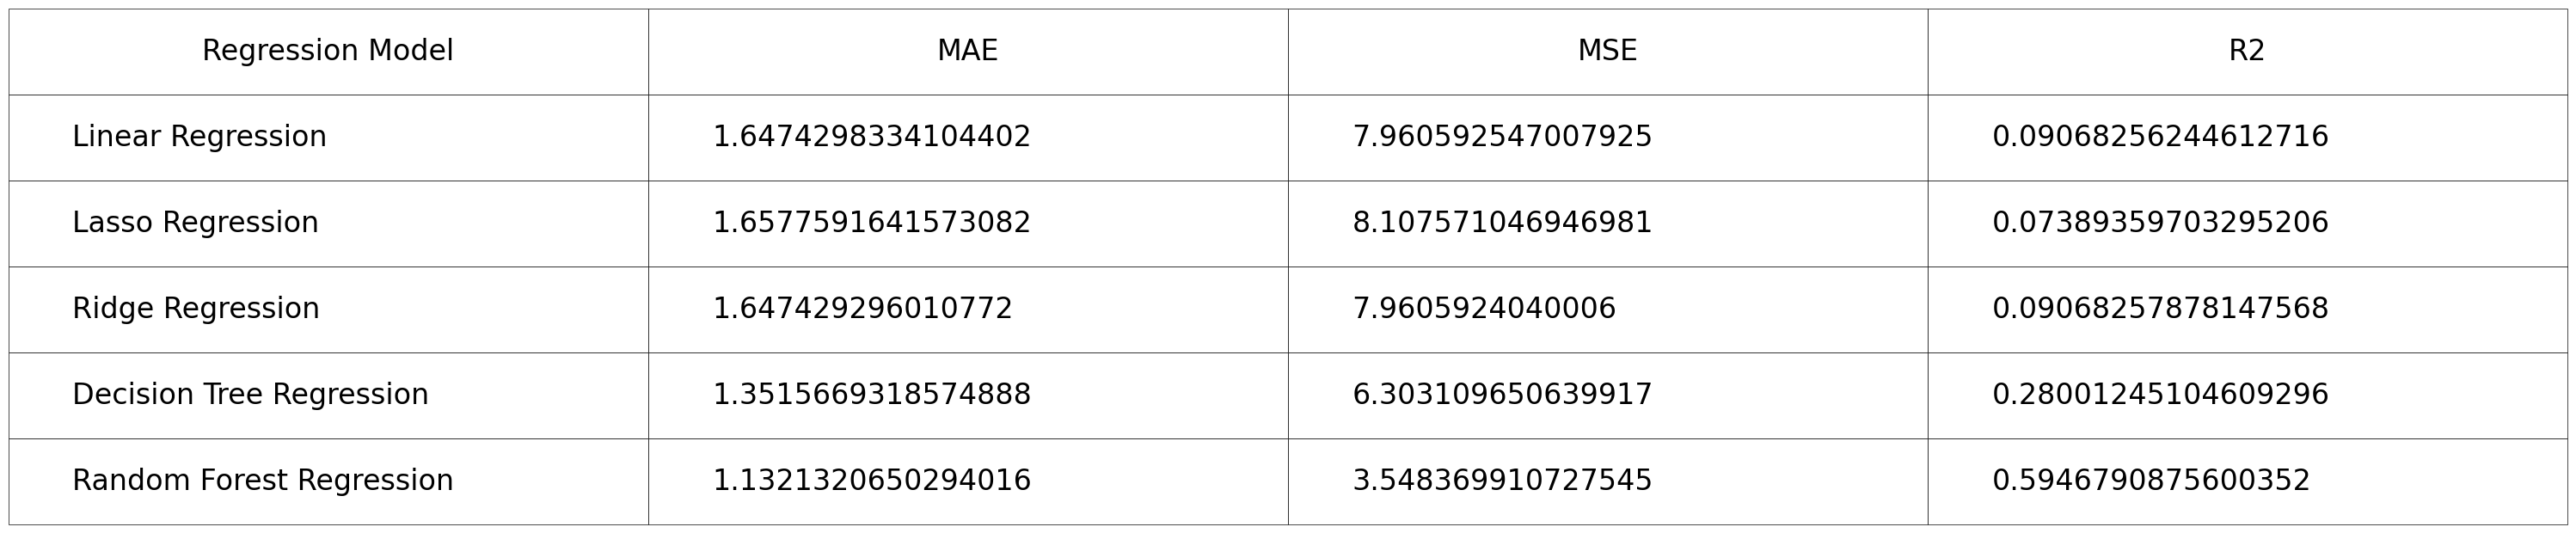

In [49]:
# final results
fig, ax = plt.subplots()
table = ax.table(cellText = table_data, loc='center', cellLoc='left', colLabels=['Regression Model', 'MAE', 'MSE', 'R2'])
table.scale(6,6)
table.set_fontsize(24)
ax.axis('off')
plt.savefig("regression_results.jpg")
plt.show()